In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score


In [16]:
data=pd.read_csv("data/Currencies/coin_Bitcoin.csv")

In [17]:
data

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.000000e+00,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09
...,...,...,...,...,...,...,...,...,...,...
2986,2987,Bitcoin,BTC,2021-07-02 23:59:59,33939.588699,32770.680780,33549.600177,33897.048590,3.872897e+10,6.354508e+11
2987,2988,Bitcoin,BTC,2021-07-03 23:59:59,34909.259899,33402.696536,33854.421362,34668.548402,2.438396e+10,6.499397e+11
2988,2989,Bitcoin,BTC,2021-07-04 23:59:59,35937.567147,34396.477458,34665.564866,35287.779766,2.492431e+10,6.615748e+11
2989,2990,Bitcoin,BTC,2021-07-05 23:59:59,35284.344430,33213.661034,35284.344430,33746.002456,2.672155e+10,6.326962e+11


In [18]:
# Convert Date column to datetime
data['Date'] = pd.to_datetime(data['Date'])

In [19]:
data['Date'].unique()

<DatetimeArray>
['2013-04-29 23:59:59', '2013-04-30 23:59:59', '2013-05-01 23:59:59',
 '2013-05-02 23:59:59', '2013-05-03 23:59:59', '2013-05-04 23:59:59',
 '2013-05-05 23:59:59', '2013-05-06 23:59:59', '2013-05-07 23:59:59',
 '2013-05-08 23:59:59',
 ...
 '2021-06-27 23:59:59', '2021-06-28 23:59:59', '2021-06-29 23:59:59',
 '2021-06-30 23:59:59', '2021-07-01 23:59:59', '2021-07-02 23:59:59',
 '2021-07-03 23:59:59', '2021-07-04 23:59:59', '2021-07-05 23:59:59',
 '2021-07-06 23:59:59']
Length: 2991, dtype: datetime64[ns]

In [20]:
# Create a figure using Plotly Express
fig = px.line(data, x='Date', y=['High', 'Low', 'Open', 'Close'],
              labels={'Date': 'Date', 'value': 'Price'},
              title='Bitcoin Price Trends Over Time')

# Customize the figure
fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Price',
    legend_title_text='Price Type',
    hovermode='x',
)

# Show the interactive plot
fig.show()

In [21]:
# Calculate daily price volatility (High - Low)
data['Volatility'] = data['High'] - data['Low']

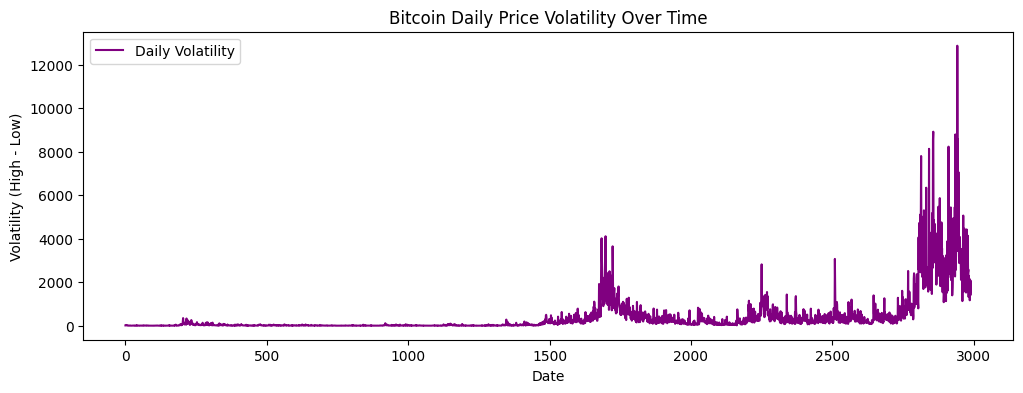

In [22]:
# Create a figure and axis for plotting
fig, ax = plt.subplots(figsize=(12, 4))

# Plot daily price volatility
ax.plot(data.index, data['Volatility'], label='Daily Volatility', color='purple')

# Add labels, title, and legend
ax.set_xlabel('Date')
ax.set_ylabel('Volatility (High - Low)')
ax.set_title('Bitcoin Daily Price Volatility Over Time')
ax.legend()

# Display the plot
plt.show()


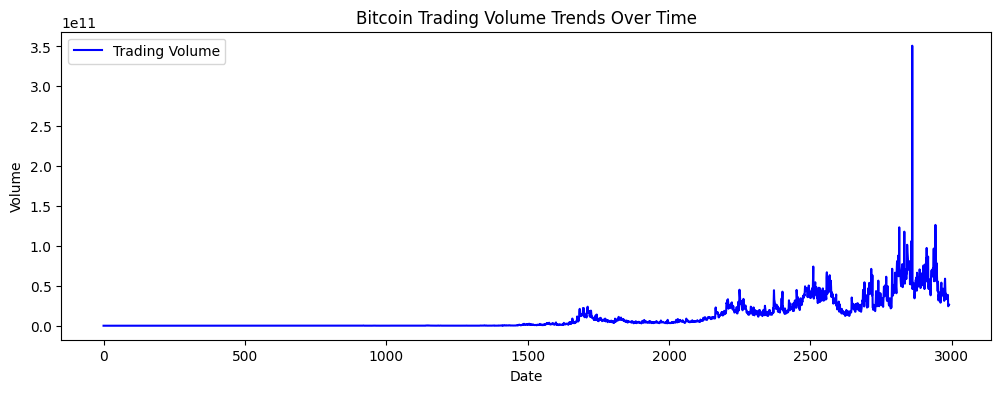

In [23]:
# Create a figure and axis for plotting
fig, ax = plt.subplots(figsize=(12, 4))

# Plot trading volume
ax.plot(data.index, data['Volume'], label='Trading Volume', color='blue')

# Add labels, title, and legend
ax.set_xlabel('Date')
ax.set_ylabel('Volume')
ax.set_title('Bitcoin Trading Volume Trends Over Time')
ax.legend()

# Display the plot
plt.show()


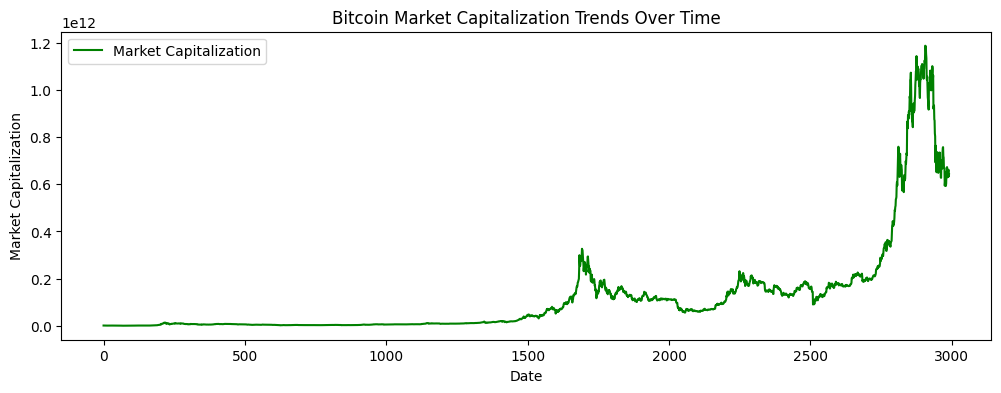

In [24]:
# Create a figure and axis for plotting
fig, ax = plt.subplots(figsize=(12, 4))

# Plot market capitalization
ax.plot(data.index, data['Marketcap'], label='Market Capitalization', color='green')

# Add labels, title, and legend
ax.set_xlabel('Date')
ax.set_ylabel('Market Capitalization')
ax.set_title('Bitcoin Market Capitalization Trends Over Time')
ax.legend()

# Display the plot
plt.show()

In [25]:
# Calculate correlations
correlations = data[['Close', 'Volume', 'Marketcap']].corr()

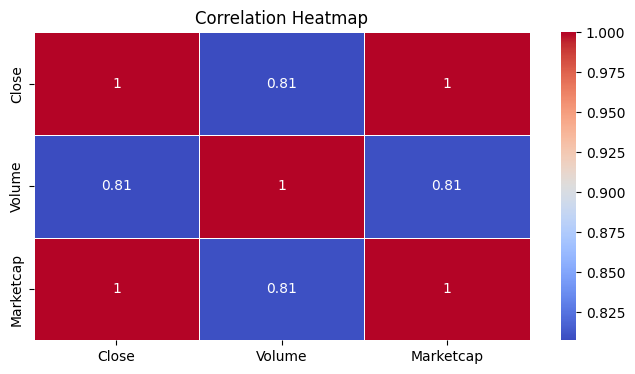

In [26]:
# Create a heatmap of correlations
plt.figure(figsize=(8, 4))
sns.heatmap(correlations, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')

# Display the plot
plt.show()

In [27]:
X = data[['Volume', 'Marketcap']]  
y = data['Close']  # Target variable

In [28]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
r2 = r2_score(y_test, y_pred)

In [30]:
# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"R-squared (R2) Score: {r2:.2f}")

Mean Absolute Error (MAE): 188.55
Mean Squared Error (MSE): 77234.78
Root Mean Squared Error (RMSE): 277.91
Mean Absolute Percentage Error (MAPE): 29.31%
R-squared (R2) Score: 1.00


In [31]:
# Define evaluation metrics as scoring functions
scoring_functions = {
    'MAE': make_scorer(mean_absolute_error),
    'MSE': make_scorer(mean_squared_error),
    'RMSE': make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred))),
    'R2': make_scorer(r2_score)
}

# Perform k-fold cross-validation (e.g., k=5)
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)

print("Cross-Validation:\n ")
for metric_name, scoring_func in scoring_functions.items():
    scores = cross_val_score(model, X, y, cv=k_fold, scoring=scoring_func)
    print(f"{metric_name}:")
    for i in range(0, len(scores), 5):
        print("  ", end="")
        for j in range(i, min(i + 5, len(scores))):
            print(f"Fold {j+1}: {scores[j]:.2f}", end="   ")
        print()
    print(f"  Mean {metric_name}: {np.mean(scores):.2f}")
    print()

Cross-Validation:
 
MAE:
  Fold 1: 188.55   Fold 2: 181.87   Fold 3: 180.55   Fold 4: 174.52   Fold 5: 201.11   
  Mean MAE: 185.32

MSE:
  Fold 1: 77234.78   Fold 2: 68410.40   Fold 3: 67370.18   Fold 4: 59710.85   Fold 5: 94565.20   
  Mean MSE: 73458.28

RMSE:
  Fold 1: 277.91   Fold 2: 261.55   Fold 3: 259.56   Fold 4: 244.36   Fold 5: 307.51   
  Mean RMSE: 270.18

R2:
  Fold 1: 1.00   Fold 2: 1.00   Fold 3: 1.00   Fold 4: 1.00   Fold 5: 1.00   
  Mean R2: 1.00



In [32]:
newdata=pd.read_csv("data/BitcoinData/BTC-2021min.csv")

In [33]:
#Renaming Columns
newdata['SNo']=data['SNo']
newdata['Name']=data['Name']
newdata['Symbol']=data['Symbol']
newdata['Date']=newdata['date']
newdata['High']=newdata['high']
newdata['Low']=newdata['low']
newdata['Open']=newdata['open']
newdata['Close']=newdata['close']
newdata['Volume']=newdata['Volume BTC']
newdata['Marketcap']=data['Marketcap']
newdata['Volatility']=data['Volatility']


In [34]:
newdata=newdata.drop(columns=['unix','date','symbol','open','high','low','close','Volume BTC','Volume USD'])

In [35]:
newdata=newdata.dropna()

In [36]:
X_new=newdata[['Volume', 'Marketcap']] 

In [37]:
new_prediction=model.predict(X_new)

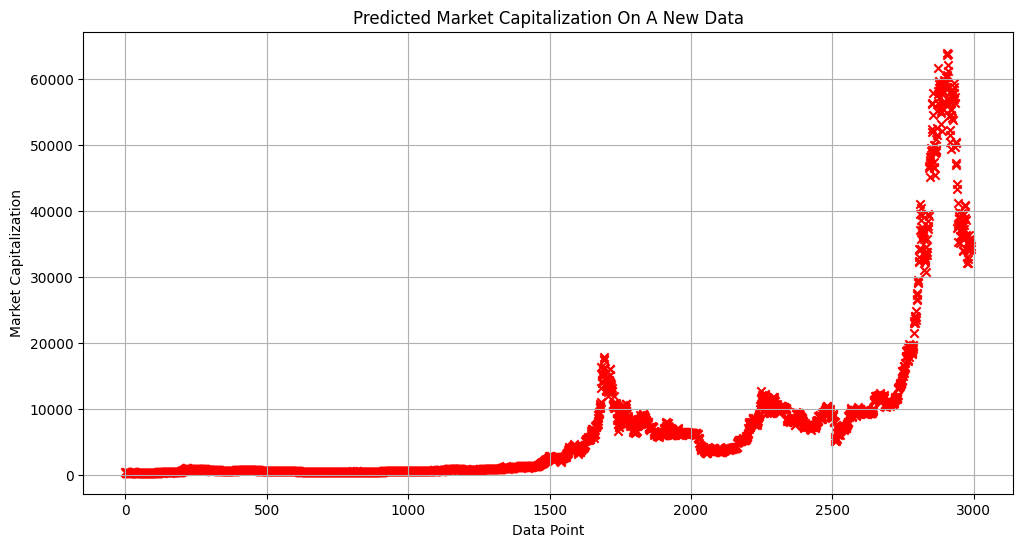

In [38]:
# Predicted market capitalization values from your model
predicted_marketcap = new_prediction

# Create a scatter plot to compare actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.scatter(range(len(predicted_marketcap)), predicted_marketcap, color='red', marker='x')
plt.xlabel('Data Point')
plt.ylabel('Market Capitalization')
plt.title('Predicted Market Capitalization On A New Data')
plt.grid(True)

# Show the plot
plt.show()